`$sug`s visualization

In [1]:
evaluator_to_sug_file = '../Resources/evaluator_to_sug.tsv'

In [2]:
import json
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords

In [3]:
evaluator_to_sugs = {}
cnt = 0
with open(evaluator_to_sug_file) as f:
    next(f)
    for line in f:
        ln = line.strip().split('\t')
        if len(ln) - 1:
            try:
                evaluator_to_sugs[ln[0]].append(ln[1])
            except KeyError:
                evaluator_to_sugs[ln[0]] = [ln[1]]

In [4]:
all_sugs_combined = ' '.join([
    ' '.join(evaluator_to_sugs[evaluator])
    for evaluator in evaluator_to_sugs
])

In [5]:
evaluator_to_all_associated_sugs = {
    evaluator: ' '.join(evaluator_to_sugs[evaluator])
    for evaluator in evaluator_to_sugs
}

In [6]:
ps = PorterStemmer()
ct = Counter()

In [7]:
sw = {ps.stem(x) for x in set(stopwords.words('english'))}

In [8]:
sw |= {
    ps.stem(x)
    for x in set(json.load(open('../WorkingJsons/20190714_stopwords_for_sugs.json')))
}

In [9]:
all_sugs_stemmed = [
    ps.stem(x)
    for x in all_sugs_combined.split()
]

In [10]:
for w in all_sugs_stemmed:
    if w not in sw:
        ct[w] += 1

In [11]:
punct = '.,;:/?!()\"\''

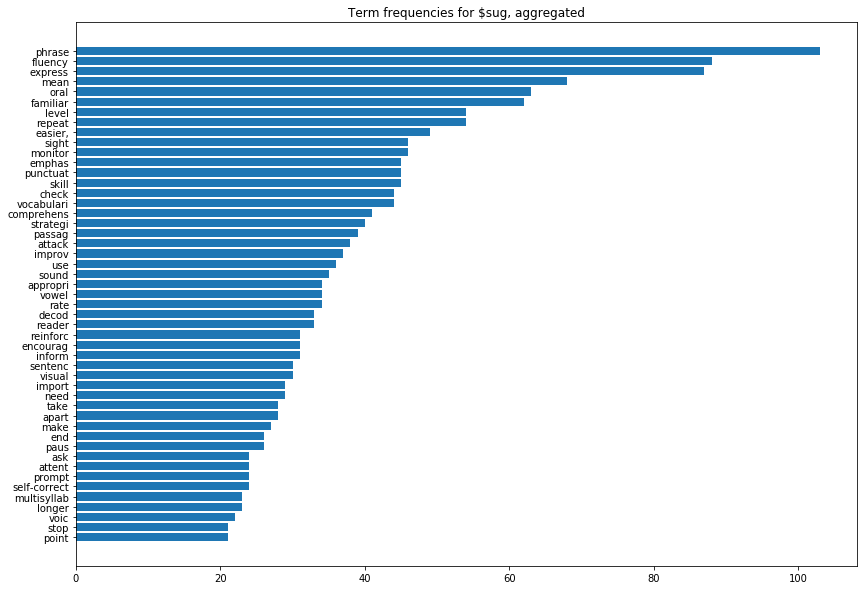

In [12]:
n = 50
most_common = dict(ct.most_common(n))
most_common['fluency'] = most_common['fluenci'] + most_common['fluent']
most_common.pop('fluenci')
most_common.pop('fluent')
sort = sorted(most_common.keys(), key=lambda k: -most_common[k])

terms = [x for x in sort][::-1]
freq = [most_common[x] for x in sort][::-1]

plt.figure(figsize=(14, 10))
plt.title('Term frequencies for $sug, aggregated')
plt.barh(terms, freq)
plt.show()

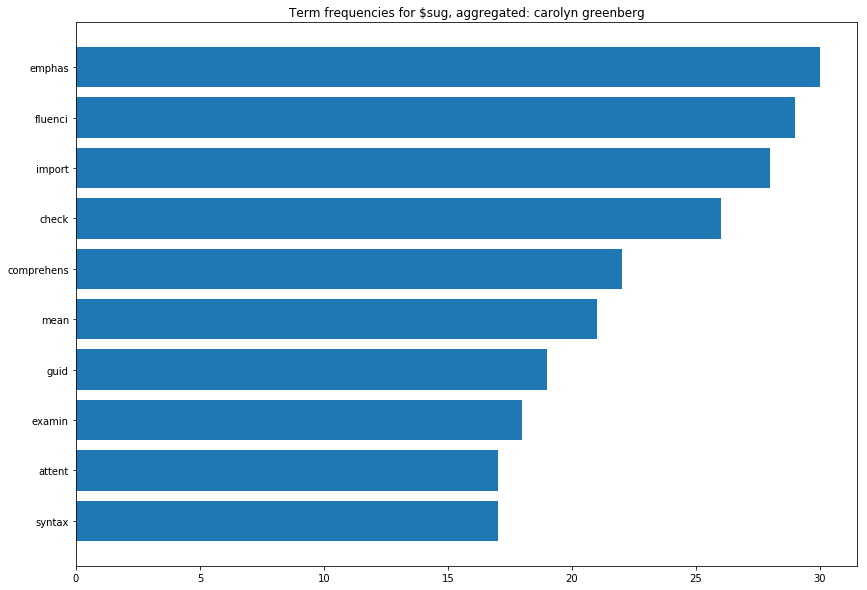

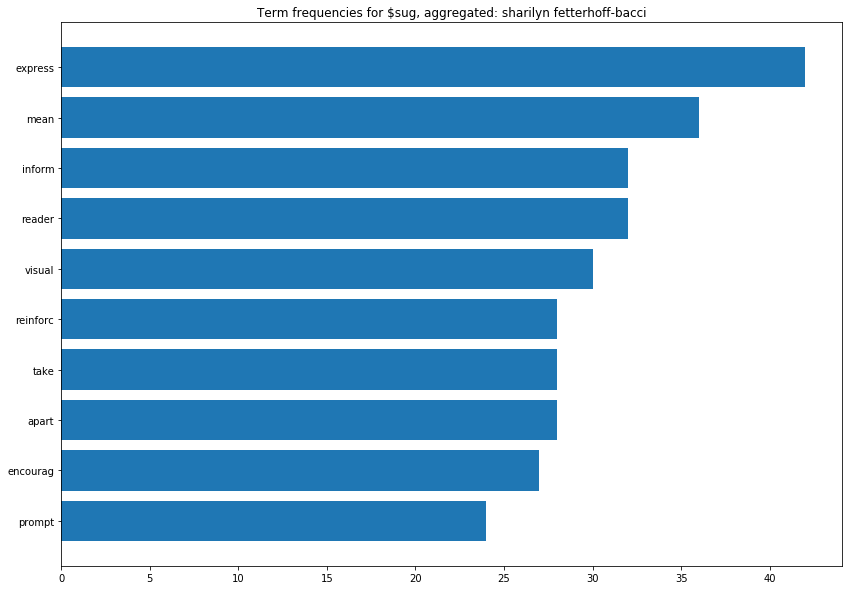

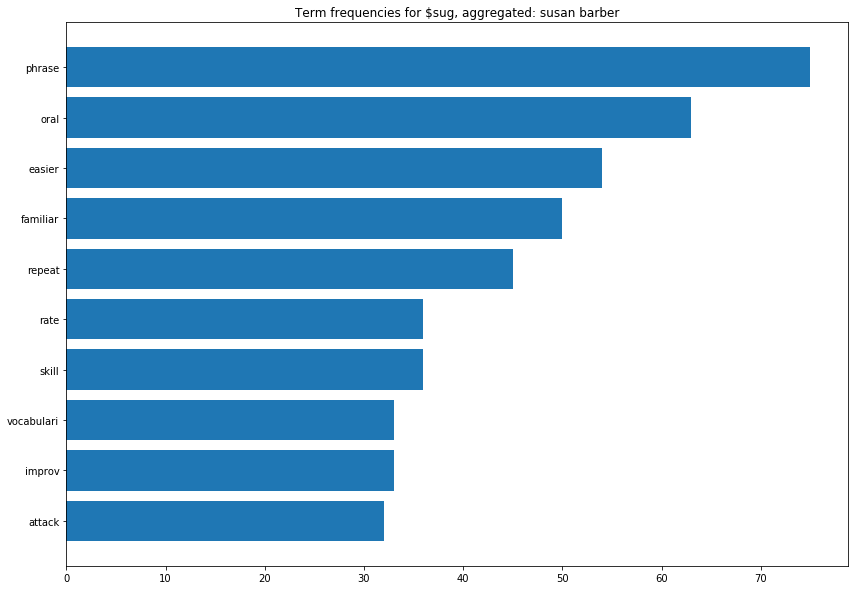

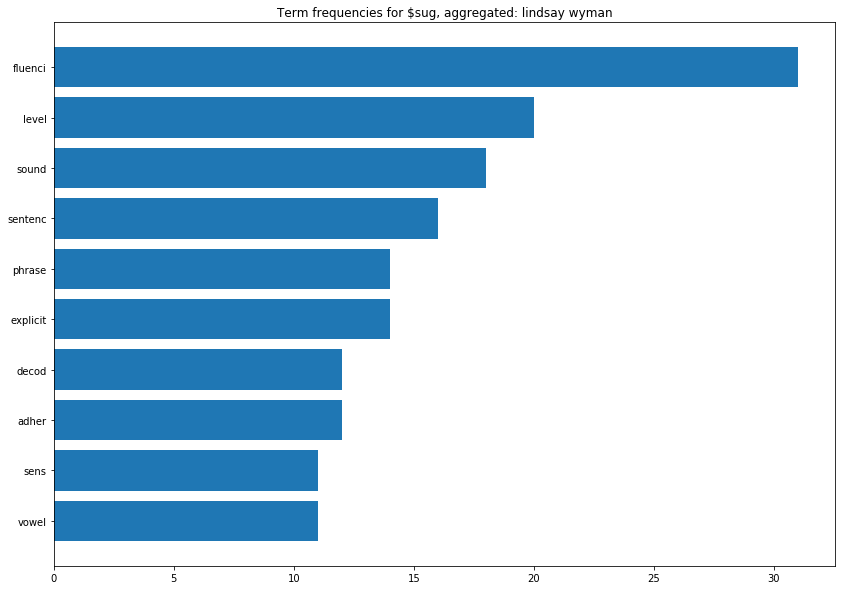

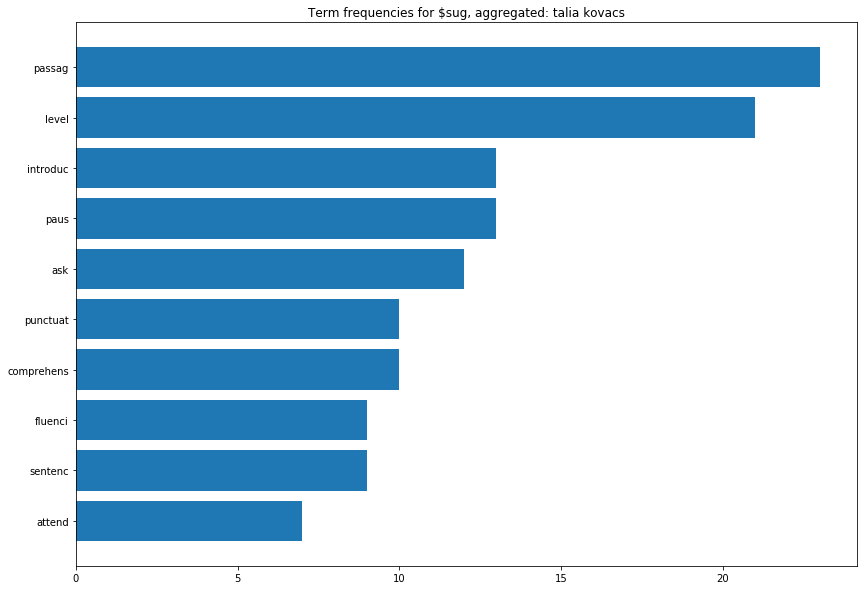

In [13]:
n = 10
for evaluator, associated in evaluator_to_all_associated_sugs.items():
    cnt = Counter()
    for w in nltk.word_tokenize(associated):
        if w not in punct and ps.stem(w) not in sw:
#         if ps.stem(w) not in sw:
            cnt[ps.stem(w)] += 1
    most_common = dict(cnt.most_common(n))
    if 'fluenci' in most_common and 'fluent' in most_common:
        most_common['fluency'] = most_common['fluenci'] + most_common['fluent']
        most_common.pop('fluenci')
        most_common.pop('fluent')
    
    sort = sorted(most_common.keys(), key=lambda k: -most_common[k])

    terms = [x for x in sort][::-1]
    freq = [most_common[x] for x in sort][::-1]

    plt.figure(figsize=(14, 10))
    plt.title('Term frequencies for $sug, aggregated: ' + evaluator)
    plt.barh(terms, freq)
    plt.show()

In [14]:
evaluator_to_sugs_wc = {
    e: Counter([
        ps.stem(w)
        for w in nltk.word_tokenize(assoc)
        if ps.stem(w) not in punct and
            ps.stem(w) not in sw
    ])
    for e, assoc in evaluator_to_all_associated_sugs.items()
}

In [15]:
normalized_e_to_freq = {}
for e, cnts in evaluator_to_sugs_wc.items():
    n_words = sum([cnts[w] for w in cnts])
    normalized_e_to_freq[e] = {
        w: cnts[w] / n_words
        for w in cnts
    }

In [16]:
token_aggregate = {
    ps.stem(w)
    for w in nltk.word_tokenize(all_sugs_combined)
    if w not in punct and ps.stem(w) not in sw
}

In [17]:
evals = evaluator_to_sugs.keys()
tkn_to_cnt_across_evals = {}
for tkn in token_aggregate:
    freqs = []
    for e in evals:
        if tkn in normalized_e_to_freq[e]:
            freqs.append(normalized_e_to_freq[e][tkn])
    tkn_to_cnt_across_evals[tkn] = (sum(freqs) / len(evals))

In [18]:
top_n = 20
for tkn in sorted(
    tkn_to_cnt_across_evals,
    key=lambda a: -tkn_to_cnt_across_evals[a]
)[:top_n]:
    print(tkn)

fluenci
phrase
level
express
mean
passag
check
comprehens
punctuat
emphas
familiar
sentenc
decod
strategi
vowel
sound
repeat
oral
ask
visual
